## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv(r'C:\Users\Eng-mody\Desktop\Gitrepo\ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [3]:
print('Total number of rows in dataset are {}'.format(df.shape[0]))

Total number of rows in dataset are 294478


c. The number of unique users in the dataset.

In [4]:
unique_users = df['user_id'].nunique()

print('The total number of unique users are {}'.format(unique_users))

The total number of unique users are 290584


d. The proportion of users converted.

In [5]:
converted_proportion = df['converted'].mean() # as converted column is 0 and 1 only so mean of it give us the proportion
print("The proportion of users converted is {}".format(round(converted_proportion,5)))

The proportion of users converted is 0.11966


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# landing_page equals new_page but group is not treatment
# landing_page not new_page but group is treatment

condition_1=(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')
condition_2 = (df['landing_page'] != 'new_page') & (df['group'] == 'treatment')

x = df[condition_1 | condition_2].user_id.count()

print(" The Total number of times the new_page and treatment don't line up is {}".format(x))

 The Total number of times the new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**There is no entry with any missing values in our data**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2 = df[~(condition_1 | condition_2) ].copy()

In [14]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
unique_users = df2['user_id'].nunique()

print('The total number of unique users are {}'.format(unique_users))

The total number of unique users are 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2['user_id'][df2['user_id'].duplicated(keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2 = df2.drop_duplicates(keep='first')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [33]:
x1=df2['converted'].mean()
print(" the probability of an individual converting regardless of the page they receive is {}".format(x))

 the probability of an individual converting regardless of the page they receive is 0.11880724790277405


b. Given that an individual was in the `control` group, what is the probability they converted?

In [36]:
given_control=df2['converted'][df2['group']=='control'].mean()
print(" the probability of an individual converting Given that they are in control group is {}".format(x))

 the probability of an individual converting Given that they are in control group is 0.11880724790277405


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [37]:
given_treatemnt=df2['converted'][df2['group']=='treatment'].mean()
print(" the probability of an individual converting Given that they are in treatment group is {}".format(x))

 the probability of an individual converting Given that they are in treatment group is 0.11880724790277405


d. What is the probability that an individual received the new page?

In [ ]:
x=df2['converted'][df2['landing_page']=='new_page'].mean()
print(" the probability of an individual converting Given that they are in control group is {}".format(x))

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**After investigating the propability for conversion regardless page they recieved which is 0.11959 and the probability of an individual converting Given that they are in control group which is 0.12038 and the probability of an individual converting Given that they are in treatment group which is 0.1188**

### My conclusion is:

**There is no sufficient evidence that the treatment page leads to more conversions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis:Probability of old page and new page are bothe equal or the old page is better**

**Alternative Hypothesis: The probability of new page is better than old page is greater than that of old page**

#### 𝐻0: 𝑝𝑜𝑙𝑑 − 𝑝𝑛𝑒𝑤 ≥ 0
 
#### 𝐻𝐴: 𝑝𝑜𝑙𝑑 − 𝑝𝑛𝑒𝑤 <0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new=df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old=df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$?

In [25]:
n_new=df2.query('landing_page=="new_page"').count()[0]
n_new

145311

d. What is $n_{old}$?

In [26]:
n_old=df2.query('landing_page=="old_page"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted= np.random.binomial(1, p_new, size=n_new) 


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted= np.random.binomial(1, p_old, size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
difference = new_page_converted.mean()-old_page_converted.mean()
print("the 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑  for our simulated values from part (e) and (f). is {}".format(difference))

the 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑  for our simulated values from part (e) and (f). is -0.0008427942999113675


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [31]:
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([1,0], p=[p_new, 1-p_new], size=n_new)
    old_page_converted = np.random.choice([1,0], p=[p_old, 1-p_old], size=n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

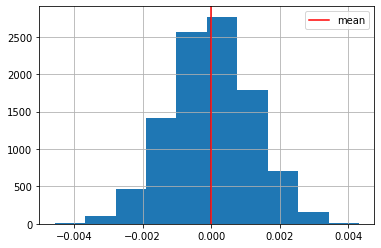

In [32]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
actual_diff =given_treatemnt-given_control

In [39]:
(actual_diff < p_diffs).mean()


0.9036

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value called in scientific studies a p-value and according to its value we decided to accept or reject null hypothesis for 95% confidence level we must have a p-value less than 0.05 to reject null if it higher than 0.05 we fail to reject it so in our case the p-value we have is 0.9036 which greater than 0.05 so we fail to reject null hypothesis So there is no significant impact for new page implementation**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page=="old_page" ').count()[0]
convert_new = df2.query('converted == 1 and landing_page=="new_page"').count()[0]
n_old = df2.query('landing_page=="old_page"').count()[0]
n_new = df2.query('landing_page=="new_page"').count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='larger')
print("The Z score for othis model is {} while p-value is {}".format(round(z_score,4),round(p_value,4)))

The Z score for othis model is -1.3116 while p-value is 0.9052


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**our z score is -1.3116 this mean that our mean is below actual data mean by 1.3116 standard deviation but for 95% confidence level this value is less than the critical z score for which it ends the region in which we can accept null ypothesis so if our analysis get a z score less than the critical value for our confidence interval so we reject null and our z score is -1.3116 while z critical for two tailed and 95% CI is +/- 1.645**

**Values are different from parts j and k but still suggests that there is no statistically significant betweem the new and the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression is the best type.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
df2['intercept']=1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [46]:
logistic_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
answer = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 May 2020   Pseudo R-squ.:               8.085e-06
Time:                        02:44:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**he p-value associated with ab_page is 0.19 which still larger than 0.05 so we fail to reject null hypothesis**

- in part II our hypothesis is one tailed while here in logistic regression it's 2 tailed hypothesis this make the difference in p values between both test 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**I think to get better result regardless accept or reject null hypothesis but to be sure about our result we need to segment users into granular groups for example divide users based on ages or sexual as we know women affected more than men by colors and design this may bias our results but on the other hand if we add unrelevant variables or many variables related to each other this will cause multicolinearity issue,whis is correlation between variables this lead to false model and incorrect results**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
countries_df = pd.read_csv(r'C:\Users\Eng-mody\Desktop\Gitrepo\countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [49]:
### Create the necessary dummy variables
df_new[['CANADA','UK','US']]=pd.get_dummies(df_new['country'])

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
### Fit Your Linear Model And Obtain the Results
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CANADA', 'US']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        02:57:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CANADA        -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

After doing our analysis using three different approaches we take the same decision but each model gernerate different result for example the difference between result in part 2 and part 3 due to difference in Hypotheses we stated this need a good interpretation skills to figure out model result in a good way in addition to the last part after we did regression taking in our consideration diversity due to country we have same results and reject null hypothes due to large p values for CANDA which is 0.074 and US which is 0.456.

**Difference between statistical reasoning and practical reasoning**
However in each one of approaches there is a very very slight difference between probability for each group and page design but this difference from statistics point of view is significant but practically not we have to further investigate it this may occurs due to random chance but not due to a reasonable effects.
